In [2]:
import pandas as pd
data = pd.read_csv('adult.csv')

### Fetch random samples from the data (50% of the data)

In [3]:
data.sample(frac=0.5) 

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
41439,55,Private,171467,HS-grad,9,Divorced,Craft-repair,Unmarried,Black,Male,0,0,48,United-States,>50K
9895,38,State-gov,239539,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Asian-Pac-Islander,Male,0,0,40,Philippines,<=50K
43981,44,Private,62258,11th,7,Never-married,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
24740,40,Self-emp-not-inc,125206,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
44915,41,Private,176452,HS-grad,9,Never-married,Other-service,Own-child,White,Male,0,0,40,Peru,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44555,24,Private,130741,Bachelors,13,Never-married,Sales,Own-child,White,Male,0,0,40,United-States,<=50K
30930,24,Private,275093,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,White,Female,0,0,36,United-States,<=50K
41696,36,Private,126954,HS-grad,9,Divorced,Transport-moving,Not-in-family,White,Male,0,0,40,United-States,<=50K
31382,51,Self-emp-not-inc,276456,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,3103,0,30,United-States,>50K


### Check null values

In [4]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

### Perform Data Cleaning [ Replace '?' with NaN ]

In [5]:
data.replace('?', 'NaN', inplace=True)

### Drop all the missing values

In [6]:
data.dropna(inplace=True, how='any')

### Check for duplicate data and drop it

In [7]:
data.drop_duplicates(inplace=True)

### Drop The Columns education-num, capital-gain, and capital-loss

In [11]:
data.drop(['educational-num', 'capital-gain', 'capital-loss'], axis=1, inplace=True)
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')

### What Is The Distribution of Age Column?

<Axes: >

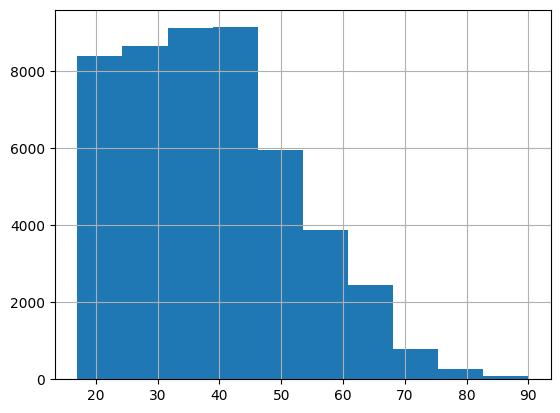

In [12]:
data['age'].hist()

### Find Total Number of Persons Having Age Between 17 To 48 (Inclusive) Using Between Method

In [18]:
data['age'].between(17, 48).sum()

np.int64(37272)

### What is The Distribution of Workclass Column?

<Axes: >

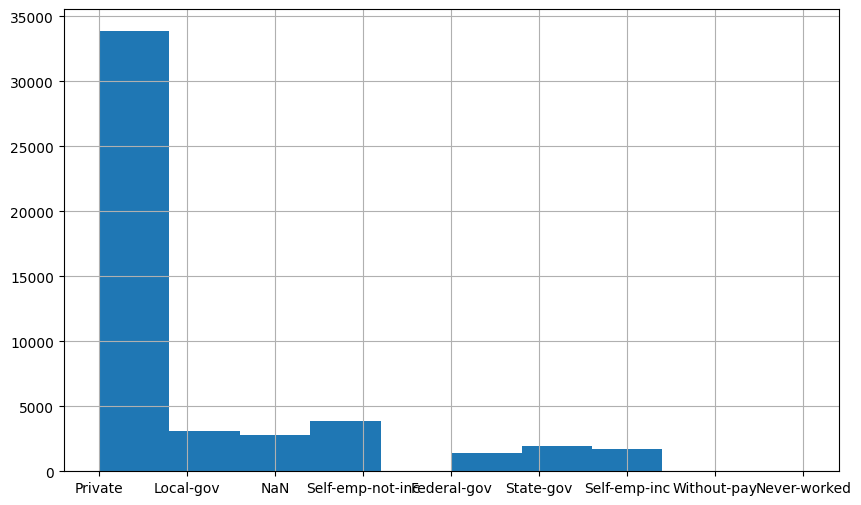

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
data['workclass'].hist()

### How many persons having Bachelors degree or Masters degree

In [24]:
len(data[(data['education'] == 'Bachelors') | (data['education'] == 'Masters')])

10669

### Bivariate Analysis

<Axes: xlabel='income', ylabel='age'>

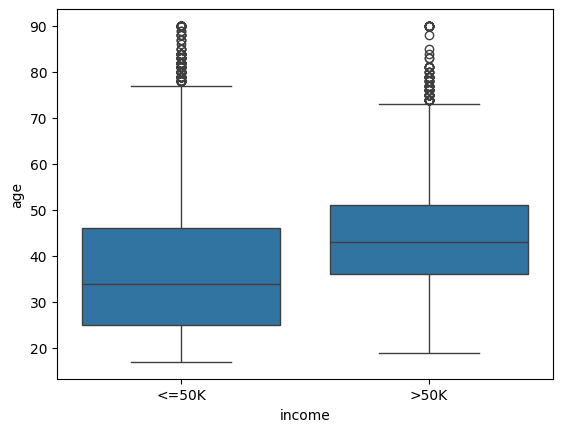

In [27]:
# Bivariate Analysis is the simultaneous analysis of two variables (attributes). 
import seaborn as sns
sns.boxplot(x='income', y='age', data=data)

### Replace Salary Values ['<=50K', '>50K'] With 0 and 1

<Axes: xlabel='income', ylabel='age'>

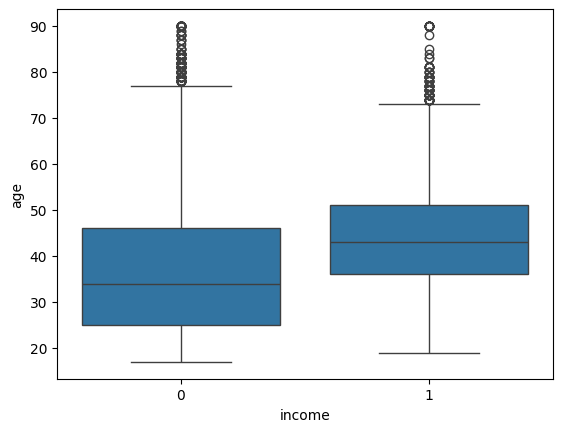

In [31]:
data['income'].replace('<=50K', 0, inplace=True)
data['income'].replace('>50K', 1, inplace=True)

# Bivariate Analysis is the simultaneous analysis of two variables (attributes). 
import seaborn as sns
sns.boxplot(x='income', y='age', data=data)

### Which Workclass Getting The Highest Salary?

In [34]:
data.groupby('workclass')['income'].mean().sort_values(ascending=False)

workclass
Self-emp-inc        0.553719
Federal-gov         0.391760
Local-gov           0.295599
Self-emp-not-inc    0.278943
State-gov           0.267542
Private             0.217986
Without-pay         0.095238
NaN                 0.094812
Never-worked        0.000000
Name: income, dtype: float64

### Who Has Better Chance To Get Salary greater than 50K Male or Female?

In [36]:
data.groupby('gender')['income'].mean().sort_values(ascending=False)

gender
Male      0.303919
Female    0.109360
Name: income, dtype: float64

### Covert workclass Columns Datatype To Category Datatype

In [37]:
data['workclass'] = data['workclass'].astype('category')